In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
np.random.seed(0)

# generating globs
N = 100
c = np.asarray(
  [[1, 1],   # 1st glob center coordinates
   [4, 3],]  # 2nd glob center coordinates
)
sigma = [1.0, 0.5]
xy0 = np.stack([np.random.normal(i, sigma[0], N, ) for i in c[0]], axis=1)
xy1 = np.stack([np.random.normal(i, sigma[1], N, ) for i in c[1]], axis=1)

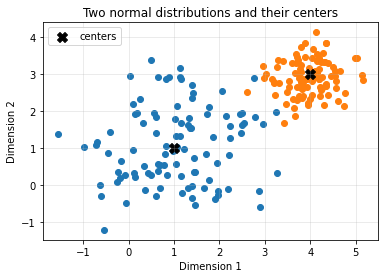

In [155]:
fig, ax = plt.subplots()
ax.scatter(xy0[:, 0], xy0[:, 1], c=None)
ax.scatter(xy1[:, 0], xy1[:, 1], c=None)
ax.scatter(c[0, 0], c[0, 1], marker='X', s=100, c='black', label='centers')
ax.scatter(c[1, 0], c[1, 1], marker='X', s=100, c='black')
ax.set_title('Two normal distributions and their centers')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.grid(alpha=.3)
ax.legend()
plt.savefig("distributions.svg")

In [156]:
# dataset generation
X = np.concatenate([xy0, xy1])
y = np.concatenate([np.ones(x.shape[0])*i for i, x in enumerate([xy0, xy1])])

In [157]:
def kmeans(X, k=2, epochs=50):
    '''
    Function to calculate centroids and predict labels of distributions with
    K-means algorithm.
    '''
    N, M = X.shape
    dists = np.empty((N, k))
    c = np.empty((k, M))
    y = np.random.randint(0, k, size=N)
    for t in range(epochs):
        for i in range(k):
            c[i] = X[y == i].mean(axis=0)
            dists[:, i] = np.linalg.norm(X-c[i], axis=1)
        y = dists.argmin(axis=1)
    return c, y

In [158]:
ĉ, ŷ = kmeans(X, k=2, epochs=5)

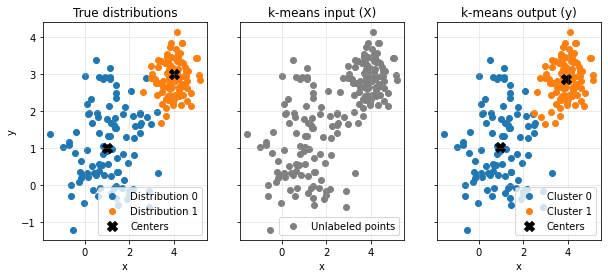

In [141]:
fig, axes = plt.subplots(1,3, figsize=(10,4), sharey=True)
axes.flat[0].set_title('True distributions')
axes.flat[0].scatter(xy0[:, 0], xy0[:, 1], label='Distribution 0')
axes.flat[0].scatter(xy1[:, 0], xy1[:, 1], label='Distribution 1')
axes.flat[0].scatter(c[0, 0], c[0, 1], marker='X', s=100, c='black', label='Centers')
axes.flat[0].scatter(c[1, 0], c[1, 1], marker='X', s=100, c='black',)
axes.flat[0].legend(loc='lower right')

axes.flat[1].set_title('k-means input (X)')
axes.flat[1].scatter(X[:, 0], X[:, 1], c='grey', label='Unlabeled points')
axes.flat[1].legend(loc='lower right')

axes.flat[2].set_title('k-means output (y)')
for i in range(2):
    axes.flat[2].scatter(X[ŷ==i, 0], X[ŷ==i, 1], label=f'Cluster {i}')
axes.flat[2].scatter(ĉ[0, 0], ĉ[0, 1], marker='X', s=100, c='black', label='Centers')
axes.flat[2].scatter(ĉ[1, 0], ĉ[1, 1], marker='X', s=100, c='black',)
axes.flat[2].legend(loc='lower right')

for ax in axes.flat:
    ax.grid(alpha=.3)
    ax.set_xlabel('x')
axes.flat[0].set_ylabel('y')
    
plt.savefig('kmeans_output.svg')
plt.show()